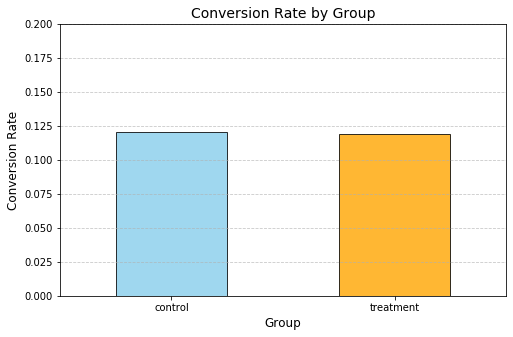

그룹별 전환율:
group
control      0.120399
treatment    0.118918
Name: converted, dtype: float64

그룹별 전환 수, 샘플 수, 신뢰구간:
             sum   count  Lower CI  Upper CI
group                                       
control    17723  147202  0.118737  0.122062
treatment  17514  147278  0.117265  0.120571


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportion_confint

# 1. 데이터 불러오기
data = pd.read_csv("C:/2024_2/ab_data.csv")

# 2. 그룹별 전환율 계산
group_conversion = data.groupby('group')['converted'].mean()

# 3. 시각화
plt.figure(figsize=(8, 5))
group_conversion.plot(kind='bar', color=['skyblue', 'orange'], alpha=0.8, edgecolor='black')
plt.title('Conversion Rate by Group', fontsize=14)
plt.ylabel('Conversion Rate', fontsize=12)
plt.xlabel('Group', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. 그룹별 전환 수와 샘플 수 계산
group_counts = data.groupby('group')['converted'].agg(['sum', 'count'])

# 5. 신뢰구간 계산 (95% 신뢰 수준)
conf_intervals = group_counts.apply(
    lambda row: proportion_confint(count=row['sum'], nobs=row['count'], alpha=0.05), axis=1
)
conf_intervals = pd.DataFrame(conf_intervals.tolist(), index=group_counts.index, columns=['Lower CI', 'Upper CI'])

# 6. 결과 정리
result = pd.concat([group_counts, conf_intervals], axis=1)

# 7. 결과 출력
print("그룹별 전환율:")
print(group_conversion)
print("\n그룹별 전환 수, 샘플 수, 신뢰구간:")
print(result)


In [2]:
import pandas as pd
import scipy.stats as stats

# 데이터 로드
data = pd.read_csv("C:/2024_2/ab_data.csv")

# 중복 사용자 제거
data = data.drop_duplicates(subset='user_id')

# 그룹별 데이터 분리
control = data[data['group'] == 'control']['converted']
treatment = data[data['group'] == 'treatment']['converted']

# 독립 t-검정 수행
t_stat, p_value = stats.ttest_ind(control, treatment)

# 결과 출력
print(f"T-검정 결과: t-stat={t_stat}, p-value={p_value}")
if p_value < 0.05:
    print("새 페이지와 기존 페이지 간의 전환율 차이가 통계적으로 유의미합니다.")
else:
    print("새 페이지와 기존 페이지 간의 전환율 차이가 통계적으로 유의미하지 않습니다.")

T-검정 결과: t-stat=1.209066628131995, p-value=0.22663823265028002
새 페이지와 기존 페이지 간의 전환율 차이가 통계적으로 유의미하지 않습니다.


In [3]:
import pandas as pd
from scipy.stats import chi2_contingency

# 데이터 로드
data = pd.read_csv("C:/2024_2/ab_data.csv")


# Landing_page와 Converted(1) 간의 교차표 생성
contingency_table = pd.crosstab(data['landing_page'], data['converted'])

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 결과 출력
print(f"카이제곱 검정 결과: chi2={chi2}, p-value={p}")
if p < 0.05:
    print("Landing Page와 전환율 사이에 유의미한 상관관계가 있습니다.")
else:
    print("Landing Page와 전환율 사이에 유의미한 상관관계가 없습니다.")

카이제곱 검정 결과: chi2=1.8605356996475382, p-value=0.17256298557816563
Landing Page와 전환율 사이에 유의미한 상관관계가 없습니다.


In [11]:
import pandas as pd
import scipy.stats as stats

# 1. 데이터 불러오기
data = pd.read_csv("C:/2024_2/ab_data.csv")

# 2. 유저 ID의 첫 자리 추출
data['user_first_digit'] = data['user_id'].astype(str).str[0]

# 3. 첫 자리에 따른 전환율 계산을 위한 분할표 생성
contingency_table = pd.crosstab(data['user_first_digit'], data['converted'])

# 4. 카이제곱 독립성 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 5. 결과 출력
print("카이제곱 통계량:", chi2)
print("p값:", p)

# 6. 유의 수준 0.05로 가설 검정
alpha = 0.05
if p < alpha:
    print("\n결론: 유저 ID의 첫 자리에 따른 전환율 차이가 통계적으로 유의미합니다 (p < 0.05).")
else:
    print("\n결론: 유저 ID의 첫 자리에 따른 전환율 차이가 통계적으로 유의미하지 않습니다 (p >= 0.05).")


카이제곱 통계량: 2.6005890725064527
p값: 0.45738628421843763

결론: 유저 ID의 첫 자리에 따른 전환율 차이가 통계적으로 유의미하지 않습니다 (p >= 0.05).


In [12]:
import pandas as pd
import scipy.stats as stats

# 1. 데이터 불러오기
data = pd.read_csv("C:/2024_2/ab_data.csv")

# 2. 유저 ID의 첫 자리 추출
data['user_first_digit'] = data['user_id'].astype(str).str[5]

# 3. 첫 자리에 따른 전환율 계산을 위한 분할표 생성
contingency_table = pd.crosstab(data['user_first_digit'], data['converted'])

# 4. 카이제곱 독립성 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 5. 결과 출력
print("카이제곱 통계량:", chi2)
print("p값:", p)

# 6. 유의 수준 0.05로 가설 검정
alpha = 0.05
if p < alpha:
    print("\n결론: 유저 ID의 뒷 자리에 따른 전환율 차이가 통계적으로 유의미합니다 (p < 0.05).")
else:
    print("\n결론: 유저 ID의 뒷 자리에 따른 전환율 차이가 통계적으로 유의미하지 않습니다 (p >= 0.05).")

카이제곱 통계량: 14.992629415627038
p값: 0.09113863296435946

결론: 유저 ID의 뒷 자리에 따른 전환율 차이가 통계적으로 유의미하지 않습니다 (p >= 0.05).
